In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso,  ElasticNet
from sklearn import ensemble
from sklearn import svm
from xgboost import XGBRegressor


from sklearn.model_selection import RandomizedSearchCV

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#import xgboost as xgb

In [2]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [4]:
#Wczytanie danych
df = pd.read_csv(URL, sep=",", encoding="utf-8")
df

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
0,3 pokoje z zielonym tarasem i balkonem + MP,759000.0,"Maślice, Fabryczna, Wrocław, dolnośląskie",61.83,12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter,...,0,0,0,0,1,1,1,0,0,1
1,Maślicka 166 C | mieszkanie K2_2,616161.0,"ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...",67.71,9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter,...,0,0,0,1,0,0,0,0,0,0
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000.0,"Bezpieczna okolice, Różanka, Psie Pole, Wrocła...",57.70,9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4,...,1,0,0,0,1,1,0,0,0,0
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000.0,"ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...",40.00,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3,...,1,0,0,1,0,0,0,0,0,0
4,"Mieszkanie, 61 m², Wrocław",633000.0,"Tarnogaj, Krzyki, Wrocław, dolnośląskie",61.00,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,"1,4 Km od Rynku Idealne dla Rodziny Stare Miasto",456000.0,"Nadodrze, Śródmieście, Wrocław, dolnośląskie",46.50,9806,3,https://www.otodom.pl/pl/oferta/1-4-km-od-rynk...,pełna własność,Zapytaj,1,...,0,0,0,1,0,0,0,0,0,0
6662,Ovo Apartamenty,699000.0,"ul. Podwale, Stare Miasto, Stare Miasto, Wrocł...",25.00,27960,1,https://www.otodom.pl/pl/oferta/ovo-apartament...,pełna własność,do zamieszkania,5,...,0,1,0,0,0,0,1,0,0,0
6663,"2-pokoje, komfortowa lokalizacja - Sienkiewicza.",834000.0,"ul. Henryka Sienkiewicza, Ołbin, Śródmieście, ...",65.97,12642,2,https://www.otodom.pl/pl/oferta/2-pokoje-komfo...,pełna własność,do zamieszkania,1,...,1,1,0,1,0,0,0,0,0,0
6664,ładne 2 pokojowe,489000.0,"ul. Jedności Narodowej, Ołbin, Śródmieście, Wr...",54.00,9056,2,https://www.otodom.pl/pl/oferta/ladne-2-pokojo...,pełna własność,do zamieszkania,4,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6666 non-null   object 
 1   prices                                      6666 non-null   float64
 2   location                                    6666 non-null   object 
 3   area                                        6666 non-null   float64
 4   price per square meter                      6666 non-null   int64  
 5   numbers_of_rooms                            6666 non-null   int64  
 6   urls                                        6666 non-null   object 
 7   property_ownership                          6666 non-null   object 
 8   condition_of_property                       6666 non-null   object 
 9   floor                                       6666 non-null   object 
 10  balcon_garde

In [6]:
y = df['prices']

In [7]:
columns_to_remove = ["titles", "prices", "price per square meter", "location", "location_remain", "province", "city", "urls", "balcon_garden_terrace", "utilities", "security", "describe"]
columns_to_remove

['titles',
 'prices',
 'price per square meter',
 'location',
 'location_remain',
 'province',
 'city',
 'urls',
 'balcon_garden_terrace',
 'utilities',
 'security',
 'describe']

In [8]:
X = df[[cname for cname in df.columns if cname not in columns_to_remove]]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area                                        6666 non-null   float64
 1   numbers_of_rooms                            6666 non-null   int64  
 2   property_ownership                          6666 non-null   object 
 3   condition_of_property                       6666 non-null   object 
 4   floor                                       6666 non-null   object 
 5   amount_of_rent                              2710 non-null   float64
 6   parking_space                               6666 non-null   object 
 7   type_of_heating                             6666 non-null   object 
 8   primary_secondary                           6666 non-null   object 
 9   seller                                      6666 non-null   object 
 10  year_of_cons

In [10]:
# Podział danych na zbiór treningowy i walidacyjny
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [11]:
# Wybór kolumna z niską ilością kategorii  
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]

#ategorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]
categorical_cols

['property_ownership',
 'condition_of_property',
 'floor',
 'parking_space',
 'type_of_heating',
 'primary_secondary',
 'seller',
 'year_of_construction',
 'type_of_development',
 'window',
 'lift',
 'home_furnishings',
 'additional_info',
 'bulding_material',
 'district']

In [12]:
if "district" not in categorical_cols:
    categorical_cols.append("disctrict")
    print("Dodano dzielnice do listy kolumn")

In [13]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int8', 'int32', 'int64', 'float64']]
numerical_cols

['area',
 'numbers_of_rooms',
 'amount_of_rent',
 'number_of_floors',
 'balcon_garden_terrace_dummy_Zapytaj',
 'balcon_garden_terrace_dummy_balkon',
 'balcon_garden_terrace_dummy_ogrodek',
 'balcon_garden_terrace_dummy_taras',
 'utilities_dummy_brak_informacji',
 'utilities_dummy_gaz',
 'utilities_dummy_internet',
 'utilities_dummy_kanalizacja',
 'utilities_dummy_prad',
 'utilities_dummy_telefon',
 'utilities_dummy_telewizja_kablowa',
 'utilities_dummy_woda',
 'security_dummy_brak_informacji',
 'security_dummy_domofon_/_wideofon',
 'security_dummy_drzwi_/_okna_antywlamaniowe',
 'security_dummy_monitoring_/_ochrona',
 'security_dummy_rolety_antywlamaniowe',
 'security_dummy_system_alarmowy',
 'security_dummy_teren_zamkniety']

In [14]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [15]:
X_train.sample(10)

,property_ownership,condition_of_property,floor,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
4801,pełna własność,Zapytaj,1,Zapytaj,Zapytaj,pierwotny,biuro nieruchomości,2018<=x,apartamentowiec,brak informacji,...,0,0,0,1,0,0,0,0,0,0
4724,Zapytaj,do zamieszkania,4,Zapytaj,miejskie,wtórny,biuro nieruchomości,1900<x<1990,blok,brak informacji,...,0,0,0,1,0,0,0,0,0,0
1409,pełna własność,Zapytaj,1,garaż/miejsce parkingowe,Zapytaj,pierwotny,biuro nieruchomości,2018<=x,brak informacji,plastikowe,...,1,1,0,0,1,0,0,0,0,1
4860,Zapytaj,Zapytaj,2,Zapytaj,Zapytaj,pierwotny,biuro nieruchomości,2018<=x,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
3438,pełna własność,do zamieszkania,4,Zapytaj,elektryczne,wtórny,prywatny,2018<=x,blok,plastikowe,...,0,0,0,0,1,0,1,0,1,0
813,Zapytaj,Zapytaj,3,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,brak informacji,brak informacji,...,1,1,0,0,1,0,0,0,0,1
5764,Zapytaj,Zapytaj,3,Zapytaj,Zapytaj,wtórny,biuro nieruchomości,2018<=x,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
4604,pełna własność,do wykończenia,1,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
5190,Zapytaj,do wykończenia,3,Zapytaj,miejskie,wtórny,biuro nieruchomości,2018<=x,apartamentowiec,brak informacji,...,0,0,0,1,0,0,0,0,0,0
3979,pełna własność,Zapytaj,Zapytaj,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,brak informacji,plastikowe,...,0,0,0,1,0,0,0,0,0,0


In [19]:
def plot_valid_pred(y_valid, y_pred, start_index, plot_width):
    start_index = start_index
    plot_width = plot_width
    x_axis = pd.Series(range(start_index, start_index + plot_width, 1))
    y_valid_plot  = y_valid.iloc[:plot_width]
    y_valid_plot = y_valid_plot.reset_index(drop=True)
    y_pred_plot  = y_pred.iloc[:plot_width]
    y_pred_plot = y_pred_plot.reset_index(drop=True)    
    data_preproc = pd.DataFrame({"x_axis": x_axis,
                             "original": y_valid_plot ,
                             "predicted": y_pred_plot})
    sns.lineplot(x="x_axis", y='value', hue='variable', data = pd.melt(data_preproc, ['x_axis']))
    plt.show()
    
def score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot: bool=False):
    pipeline.fit(X_train, y_train)
    print("----------------------------", end="\n\n")
    print(model, end="\n\n")
    print('Zbiór treningowy:')
    print('MAE: '+ str(mean_absolute_error(y_train, pipeline.predict(X_train))))
    print("Coefficient of determination r2: %.2f" % r2_score(y_train, pipeline.predict(X_train)))
    
    print('Zbiór walidacyjny:')
    print('MAE: '+ str(mean_absolute_error(y_valid, pipeline.predict(X_valid))))
    print("Coefficient of determination r2: %.2f" % r2_score(y_valid, pipeline.predict(X_valid)), end="\n\n")
    
    validation_result = cross_val_score(pipeline, X_train, y_train, cv=10)
    print('Krosswalidacja:', end="\n\n")
    print('Wynik krosswalidacji: ')
    print(validation_result)
    print("Średnia: " + str(validation_result.mean()), end="\n\n")    
    
    
    y_pred = pipeline.predict(X_valid)

    y_pred = pd.Series(y_pred)

    if plot:
        plot_valid_pred(y_valid, y_pred, 0, 100)
    
    
    
    
    print("----------------------------", end="\n\n")
    #return mean_absolute_error(y_v, preds)    

## Preprocessing

In [47]:
categorical_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer_1 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_2 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_3 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'most_frequent')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_4 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'constant', fill_value= -10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_5 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=2)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_6 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_7 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_8 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=20)),
    ('std_scaler', StandardScaler())
    ])
categorical_transformer_list = [categorical_transformer_1, categorical_transformer_2]
numerical_transformer_list = [numerical_transformer_1, numerical_transformer_2, numerical_transformer_3, numerical_transformer_4, numerical_transformer_5, numerical_transformer_6, numerical_transformer_7, numerical_transformer_8]


----------------------------

Ridge()

Zbiór treningowy:
MAE: 64751.37453134224
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64351.636921964884
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76223617 0.73957234 0.69527393 0.7081843  0.70935466 0.72185474
 0.7430223  0.75841704 0.71302418 0.7434891 ]
Średnia: 0.7294428761515257



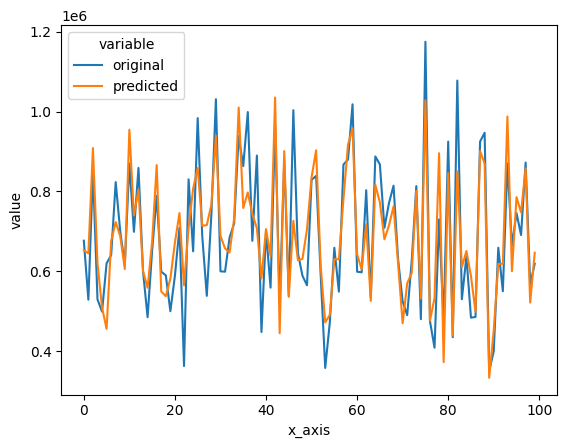

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64723.25246783518
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64391.572361480044
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76274675 0.73965734 0.69552026 0.70857783 0.70990443 0.72175263
 0.74338065 0.75868154 0.71370957 0.74373663]
Średnia: 0.7297667630388716



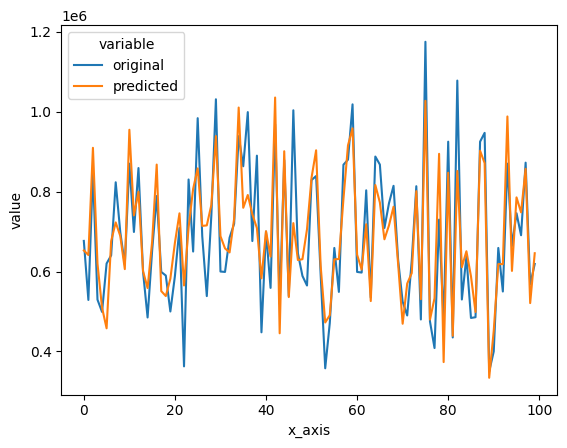

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64715.63951732508
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64406.08296870324
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76285464 0.73977725 0.69555873 0.708718   0.70992969 0.72175749
 0.74353091 0.7587547  0.71396195 0.74382425]
Średnia: 0.7298667608955778



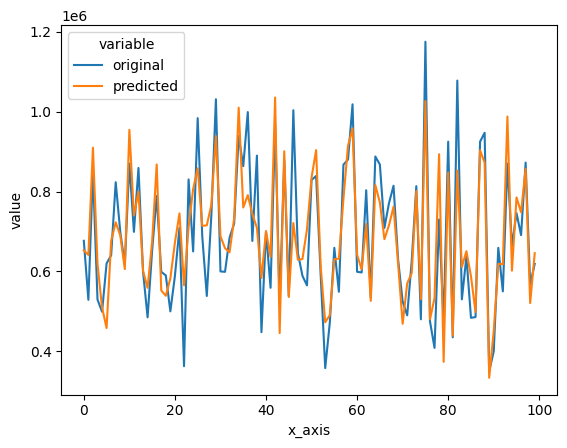

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64697.71395740796
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64041.464132918234
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76342387 0.73653133 0.69301622 0.70789576 0.70902813 0.71424261
 0.745868   0.75410267 0.71663681 0.74299174]
Średnia: 0.7283737142203968



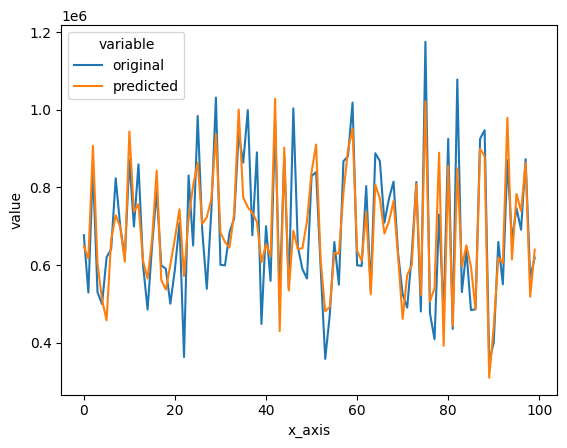

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64751.37453134224
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64351.636921964884
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76223617 0.73957234 0.69527393 0.7081843  0.70935466 0.72185474
 0.7430223  0.75841704 0.71302418 0.7434891 ]
Średnia: 0.7294428761515257



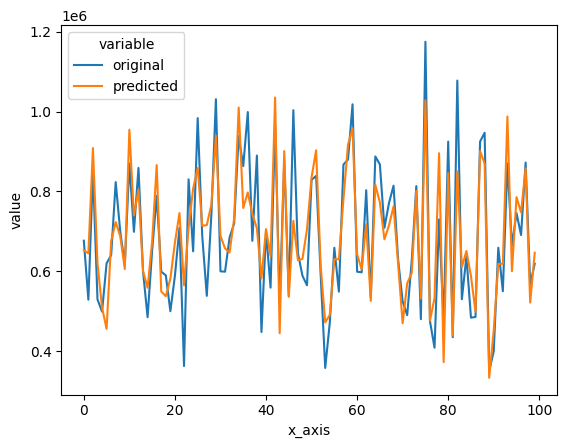

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64723.25246783518
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64391.572361480044
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76274675 0.73965734 0.69552026 0.70857783 0.70990443 0.72175263
 0.74338065 0.75868154 0.71370957 0.74373663]
Średnia: 0.7297667630388716



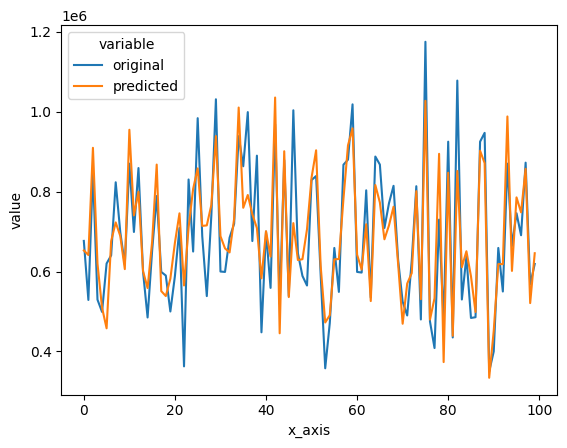

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64715.63951732508
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64406.08296870324
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76285464 0.73977725 0.69555873 0.708718   0.70992969 0.72175749
 0.74353091 0.7587547  0.71396195 0.74382425]
Średnia: 0.7298667608955778



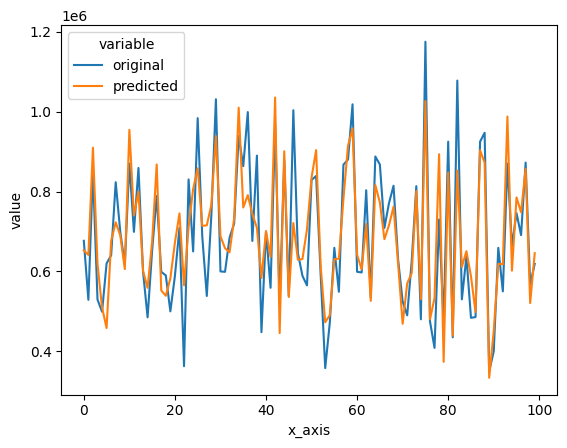

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64697.71395740796
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64041.464132918234
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76342387 0.73653133 0.69301622 0.70789576 0.70902813 0.71424261
 0.745868   0.75410267 0.71663681 0.74299174]
Średnia: 0.7283737142203968



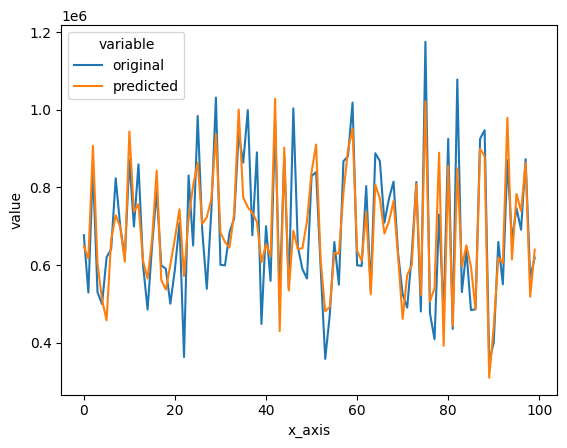

----------------------------



In [29]:
for categorical_transformer in categorical_transformer_list:
    for numerical_transformer in numerical_transformer_list:
        preprocessor = ColumnTransformer(transformers=[
                                            ('num', numerical_transformer, numerical_cols),
                                            ('cat', categorical_transformer, categorical_cols)
                                        ])
        model = Ridge()
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot=True)

In [25]:
model = Ridge()

In [93]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Teraz sprawdzam inne podejście gdzie każdy brak informacji spróbuje uzupełnić 

In [62]:
for column in X_train.columns:
    X_train.loc[X_train[column] == "brak informacji", column] = np.nan
    X_train.loc[X_train[column] == "Zapytaj", column] = np.nan
X_train
for column in X_valid.columns:
    X_valid.loc[X_valid[column] == "brak informacji", column] = np.nan
    X_valid.loc[X_valid[column] == "Zapytaj", column] = np.nan
X_valid


,property_ownership,condition_of_property,floor,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
5261,pełna własność,do wykończenia,2,garaż/miejsce parkingowe,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
944,pełna własność,NaN,1,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,apartamentowiec,plastikowe,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4916,NaN,NaN,NaN,NaN,NaN,pierwotny,biuro nieruchomości,2018<=x,szeregowiec,plastikowe,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3558,pełna własność,do wykończenia,3,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2018<=x,blok,plastikowe,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4376,pełna własność,do wykończenia,2,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,blok,plastikowe,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,pełna własność,NaN,1,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,blok,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,pełna własność,do wykończenia,2,garaż/miejsce parkingowe,NaN,pierwotny,deweloper,2018<=x,apartamentowiec,plastikowe,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4794,pełna własność,do wykończenia,2,NaN,miejskie,pierwotny,deweloper,2018<=x,blok,plastikowe,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
241,pełna własność,do zamieszkania,2,NaN,gazowe,wtórny,biuro nieruchomości,1900<x<1990,kamienica,plastikowe,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [66]:
categorical_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


numerical_transformer_1 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_2 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_3 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'most_frequent')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_4 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'constant', fill_value= -10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_5 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=2)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_6 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_7 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_8 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=20)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_9 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=20,
        max_iter=10,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

numerical_transformer_10 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=5,
        max_iter=10,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

numerical_transformer_11 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=20,
        max_iter=1,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

numerical_transformer_12 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=5,
        max_iter=1,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])







categorical_transformer_list = [categorical_transformer_1, categorical_transformer_2]
numerical_transformer_list = [numerical_transformer_1, numerical_transformer_2, numerical_transformer_3, numerical_transformer_4, numerical_transformer_5, numerical_transformer_6, numerical_transformer_7, numerical_transformer_8, numerical_transformer_9, numerical_transformer_10, numerical_transformer_11, numerical_transformer_12]



In [76]:
for categorical_transformer in categorical_transformer_list:
    for numerical_transformer in numerical_transformer_list:
        preprocessor = ColumnTransformer(transformers=[
                                            ('num', numerical_transformer, numerical_cols),
                                            ('cat', categorical_transformer, categorical_cols)
                                        ])
        #model = Ridge()
        model = XGBRegressor()
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot=False)

----------------------------

Ridge()

Zbiór treningowy:
MAE: 66532.77150173867
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 65743.46284183163
Coefficient of determination r2: 0.73

Krosswalidacja:

Wynik krosswalidacji: 
[0.74746756 0.72717674 0.67405376 0.69596182 0.68601249 0.71495842
 0.73195837 0.74285764 0.6884044  0.73228928]
Średnia: 0.714114048455466

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 66495.62250473567
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 65762.82128405383
Coefficient of determination r2: 0.73

Krosswalidacja:

Wynik krosswalidacji: 
[0.74825146 0.72735416 0.67460967 0.69664456 0.68677069 0.71516538
 0.73223873 0.74345311 0.68904604 0.73266005]
Średnia: 0.714619385410743

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 66488.00750853278
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 65778.98201727196
Coefficient of deter

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64524.00299135157
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 63847.531167229834
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76542521 0.73862768 0.69802809 0.70976857 0.7102095  0.71714853
 0.74413767 0.75634463 0.71566985 0.74327953]
Średnia: 0.7298639267917102

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64669.77397753181
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 64178.09774786451
Coefficient of determination r2: 0.75

Krosswalidacja:

Wynik krosswalidacji: 
[0.76446525 0.73994981 0.69681743 0.70916315 0.70950699 0.71916241
 0.74413989 0.75559351 0.71567917 0.74307051]
Średnia: 0.7297548117127268

----------------------------

----------------------------

Ridge()

Zbiór treningowy:
MAE: 64636.262462494655
Coefficient of determination r2: 0.75
Zbiór walidacyjny:
MAE: 63969.09358131906
Coefficient of d

In [109]:
for categorical_transformer in categorical_transformer_list:
    for numerical_transformer in numerical_transformer_list:
        preprocessor = ColumnTransformer(transformers=[
                                            ('num', numerical_transformer, numerical_cols),
                                            ('cat', categorical_transformer, categorical_cols)
                                        ])
        #model = Ridge()
        model = XGBRegressor(subsample= 0.85, sampling_method= 'uniform', n_jobs= -1, n_estimators= 700, min_split_loss=  None, min_child_weight= 0.001, max_leaves= 10000, max_depth= 7, learning_rate= 0.07, colsample_bytree= 0.75, booster= 'gbtree')
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        score_model(model, pipeline, X_train, y_train, X_valid, y_valid, plot=False)

----------------------------

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=10000,
             min_child_weight=0.001, min_split_loss=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)

Zbiór treningowy:
MAE: 9608.06480635784
Coefficient of determination r2: 0.99
Zbiór walidacyjny:
MAE: 46376.421719452774
Coefficient of determination r2: 0.83

Krosswalidacja:

Wynik krosswalidacji: 
[0.83588612 0.820763

MAE: 9573.009963428358
Coefficient of determination r2: 0.99
Zbiór walidacyjny:
MAE: 47306.331651986504
Coefficient of determination r2: 0.83

Krosswalidacja:

Wynik krosswalidacji: 
[0.82481265 0.82991302 0.78529826 0.808401   0.80817846 0.79800468
 0.82543909 0.83844191 0.82767651 0.83419608]
Średnia: 0.8180361667652521

----------------------------

----------------------------

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=10000,
             min_child_weight=0.001, min_split_loss=None, missing=nan

Krosswalidacja:

Wynik krosswalidacji: 
[0.85457392 0.83745077 0.79803191 0.81580313 0.80963422 0.81384704
 0.84086049 0.86190696 0.84024808 0.82760452]
Średnia: 0.8299961045153026

----------------------------

----------------------------

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=10000,
             min_child_weight=0.001, min_split_loss=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)

Zbiór tr

----------------------------

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=10000,
             min_child_weight=0.001, min_split_loss=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)

Zbiór treningowy:
MAE: 16013.351809124155
Coefficient of determination r2: 0.98
Zbiór walidacyjny:
MAE: 46902.377485944526
Coefficient of determination r2: 0.84

Krosswalidacja:

Wynik krosswalidacji: 
[0.83572666 0.8429

# Okazuje się, że w przypadku zmiennych kategorialnych najczęściej stosuje się SimpleImputer (metody KNN czy IterativeImputer) wymagają danych numerycznych.  